In [1]:
import os

In [2]:
%pwd

'e:\\NutBodyslam053\\work\\Projects\\MLOps\\BD528-software_engineering\\research'

In [3]:
os.chdir("../")
%pwd

'e:\\NutBodyslam053\\work\\Projects\\MLOps\\BD528-software_engineering'

In [4]:
import pandas as pd

df = pd.read_csv("artifacts/01_data_ingestion/diabetes_dataset__2019.csv")
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [97]:
df.shape

(952, 18)

# **Data Preprocessing - Dealing with Missing Value**

ขั้นตอนนี้จะเริ่มต้นด้วยการจัดการกับ missing value ตามความเหมาะสมของแต่ละตัวแปร

**1. เนื่องจากข้อมูลในตัวแปรตามมีผลโดยตรงต่อโมเดล ดังนั้น Missing Value ในคอลัม Diabetic จึงต้องตัดออก**

In [98]:
# ก่อนลบ missing value ในคอลัม Diabetic
print(len(df))

952


In [99]:
# หลังลบ missing value ในคอลัม Diabetic
df.dropna(subset=["Diabetic"], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
947,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
948,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
949,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


2. เนื่องจากคอลัม Pdiabetic เป็นประเภท Object ที่มีคำตอบแค่ yes/no มีสองทางเลือกคือตัดทิ้ง กับ replace

ในที่นี้ขอ replace เพื่อเก็บค่าไว้ เพราะไม่อยากเสียข้อมูล โดยแทนที่ด้วย no ซึ่งมีจำนวนเยอะกว่า yes

In [100]:
# replace null ด้วย mode ในคอลัม Pdiabetic
# หมายเหตุ 0 คือ no แต่ต้องเข้ากระบวนการ replace ก่อน ซึ่งอยู่ในส่วนถัดๆ ไป

df["Pdiabetes"].fillna("no", inplace=True)
print(df["Pdiabetes"].value_counts())

Pdiabetes
0      935
yes     14
no       2
Name: count, dtype: int64


In [101]:
df.isnull().sum()
# จะเห็นว่าคอลัมที่ยังต้องจัดการกับ missing value คือ BMI, และ Pregnancies ซึ่งเป็น numerric
# ดังนั้น สามารถใช้การ replace ด้วยค่ากลางของข้อมูลได้

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  3
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            0
UriationFreq         0
Diabetic             0
dtype: int64

array([[<Axes: title={'center': 'BMI'}>]], dtype=object)

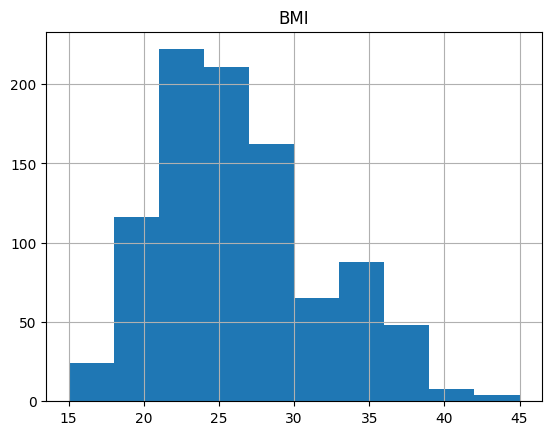

In [102]:
df.hist('BMI')

In [103]:
# ค่า BMI มีการกระจายตัวค่อนไปทางเบ้ขวา และมี Outlier จึงควรใช้ Mediean ซึ่งทนต่อ outlier มากกว่า
# ประกาศค่าตัวแปร median BMI
df["BMI"].fillna(df["BMI"].median(), inplace=True)

array([[<Axes: title={'center': 'Pregancies'}>]], dtype=object)

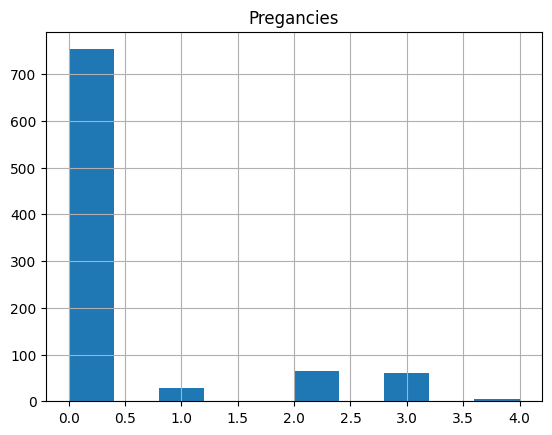

In [104]:
df.hist('Pregancies')

In [105]:
# ค่า pregnancies มีการเกาะกลุ่มที่ค่า 0 = ไม่มีอายุครรภ์ ดังนั้นจึงสมควรใช้ mode ในการแทนที่
# หมายเหตุ เนื่องจากข้อมูลมีเพศชายด้วย ดังนั้นการแทนที่ด้วย 0 จึงปลอดภัยและสมเหตุสมผลที่สุด
df["Pregancies"].fillna(df["Pregancies"].mode()[0], inplace=True)

In [106]:
df.isna().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic            0
dtype: int64

**เสร็จสิ้นการจัดการกับ missing value**

# **Data Preprocessing - Dealing with Abnormal value**

ขั้นตอนนี้จะจัดการกับค่าผิดปกติใน Column เช่น White Space, Upper Case, ใส่ข้อมูลไม่ถูกต้อง ฯลฯ

In [107]:
df.dtypes

Age                  object
Gender               object
Family_Diabetes      object
highBP               object
PhysicallyActive     object
BMI                 float64
Smoking              object
Alcohol              object
Sleep                 int64
SoundSleep            int64
RegularMedicine      object
JunkFood             object
Stress               object
BPLevel              object
Pregancies          float64
Pdiabetes            object
UriationFreq         object
Diabetic             object
dtype: object

In [108]:
# coulumn RegularMedicine
print(df['RegularMedicine'].value_counts())

RegularMedicine
no     614
yes    336
o        1
Name: count, dtype: int64


In [109]:
df['RegularMedicine'].replace({"o": "no"}, inplace=True)
df['RegularMedicine'].value_counts()

RegularMedicine
no     615
yes    336
Name: count, dtype: int64

In [110]:
print(df['BPLevel'].value_counts())

BPLevel
normal     706
high       211
low         25
High         5
Low          3
normal       1
Name: count, dtype: int64


In [111]:
df["BPLevel"] = df['BPLevel'].str.strip().str.lower()
print(df["BPLevel"].value_counts())

BPLevel
normal    707
high      216
low        28
Name: count, dtype: int64


In [112]:
df["Pdiabetes"].value_counts()

Pdiabetes
0      935
yes     14
no       2
Name: count, dtype: int64

In [113]:
# column Pdiabetes
df["Pdiabetes"].replace({"0": "no"}, inplace=True)  # replace ค่า 0 เป็น no
print(df["Pdiabetes"].value_counts())

Pdiabetes
no     937
yes     14
Name: count, dtype: int64


In [114]:
# column Diabetic
print(df["Diabetic"].value_counts())

Diabetic
no     684
yes    266
 no      1
Name: count, dtype: int64


In [115]:
df["Diabetic"] = df["Diabetic"].str.strip()
print(df["Diabetic"].value_counts())

Diabetic
no     685
yes    266
Name: count, dtype: int64


# **Data Preprocessing - Dealing with Object Type with OrdinalEncoder**

หลังจากจัดการกับข้อมูลที่มีความปกติทั้งหมดแล้ว ขั้นตอนนี้ คือการแปลงตัวแปรประเภท Object ให้อยู่ในรูปแบบ numeric เพื่อให้พร้อมต่อการขึ้นโมเดล

**แปลงข้อมูล categoty ให้เป็นตัวเลข โดยใช้ OrdinalEncoder**

In [116]:
from sklearn.preprocessing import OrdinalEncoder

In [117]:
# Recap
# เลือก encode เฉพาะ column ที่เป็น object
# ในที่นี้จะ encode ทั้ง binary และ ordinal
objecttypes = df.select_dtypes(include=['object']).columns.tolist()

for i in objecttypes:
    print(i, "\n", len(df[i].unique()), df[i].unique())

Age 
 4 ['50-59' '40-49' 'less than 40' '60 or older']
Gender 
 2 ['Male' 'Female']
Family_Diabetes 
 2 ['no' 'yes']
highBP 
 2 ['yes' 'no']
PhysicallyActive 
 4 ['one hr or more' 'less than half an hr' 'none' 'more than half an hr']
Smoking 
 2 ['no' 'yes']
Alcohol 
 2 ['no' 'yes']
RegularMedicine 
 2 ['no' 'yes']
JunkFood 
 4 ['occasionally' 'very often' 'often' 'always']
Stress 
 4 ['sometimes' 'not at all' 'very often' 'always']
BPLevel 
 3 ['high' 'normal' 'low']
Pdiabetes 
 2 ['no' 'yes']
UriationFreq 
 2 ['not much' 'quite often']
Diabetic 
 2 ['no' 'yes']


In [118]:
# encoder = OrdinalEncoder(
#     categories=[["less than 40", "40-49", "50-59", "60 or older"]])
# df["Age"] = encoder.fit_transform(df[["Age"]])

# encoder = OrdinalEncoder(categories=[["Male", "Female"]])
# df["Gender"] = encoder.fit_transform(df[["Gender"]])

# encoder = OrdinalEncoder(categories=[["yes", "no"]])
# df["Family_Diabetes"] = encoder.fit_transform(df[["Family_Diabetes"]])

# encoder = OrdinalEncoder(categories=[["no", "yes"]])
# df["highBP"] = encoder.fit_transform(df[["highBP"]])

# encoder = OrdinalEncoder(categories=[
#                          ['one hr or more', 'less than half an hr', 'none', 'more than half an hr']])
# df["PhysicallyActive"] = encoder.fit_transform(df[["PhysicallyActive"]])

# encoder = OrdinalEncoder(categories=[["yes", "no"]])
# df["Smoking"] = encoder.fit_transform(df[["Smoking"]])

# encoder = OrdinalEncoder(categories=[["yes", "no"]])
# df["Alcohol"] = encoder.fit_transform(df[["Alcohol"]])

# encoder = OrdinalEncoder(categories=[["yes", "no"]])
# df["RegularMedicine"] = encoder.fit_transform(df[["RegularMedicine"]])

# encoder = OrdinalEncoder(
#     categories=[['occasionally', 'very often', 'often', 'always']])
# df["JunkFood"] = encoder.fit_transform(df[["JunkFood"]])

# encoder = OrdinalEncoder(
#     categories=[['sometimes', 'not at all', 'very often', 'always']])
# df["Stress"] = encoder.fit_transform(df[["Stress"]])

# encoder = OrdinalEncoder(categories=[['high', 'normal', 'low']])
# df["BPLevel"] = encoder.fit_transform(df[["BPLevel"]])

# encoder = OrdinalEncoder(categories=[["yes", "no"]])
# df["Pdiabetes"] = encoder.fit_transform(df[["Pdiabetes"]])

# encoder = OrdinalEncoder(categories=[['not much', 'quite often']])
# df["UriationFreq"] = encoder.fit_transform(df[["UriationFreq"]])

# encoder = OrdinalEncoder(categories=[["no", "yes"]])
# df["Diabetic"] = encoder.fit_transform(df[["Diabetic"]])

In [119]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
for c in object_columns:
    encoder = OrdinalEncoder(categories=[df[c].unique().tolist()])
    df[c] = encoder.fit_transform(df[[c]])

In [120]:
# After Encoding
for i in objecttypes:
    print(i, "\n", len(df[i].unique()), df[i].unique())

Age 
 4 [0. 1. 2. 3.]
Gender 
 2 [0. 1.]
Family_Diabetes 
 2 [0. 1.]
highBP 
 2 [0. 1.]
PhysicallyActive 
 4 [0. 1. 2. 3.]
Smoking 
 2 [0. 1.]
Alcohol 
 2 [0. 1.]
RegularMedicine 
 2 [0. 1.]
JunkFood 
 4 [0. 1. 2. 3.]
Stress 
 4 [0. 1. 2. 3.]
BPLevel 
 3 [0. 1. 2.]
Pdiabetes 
 2 [0. 1.]
UriationFreq 
 2 [0. 1.]
Diabetic 
 2 [0. 1.]


In [121]:
# หลัง encode ข้อมูลยังมีลักษณะเป็น float เพื่อความสมบูรณ์จึงแปลงให้เป็น int
df.dtypes

Age                 float64
Gender              float64
Family_Diabetes     float64
highBP              float64
PhysicallyActive    float64
BMI                 float64
Smoking             float64
Alcohol             float64
Sleep                 int64
SoundSleep            int64
RegularMedicine     float64
JunkFood            float64
Stress              float64
BPLevel             float64
Pregancies          float64
Pdiabetes           float64
UriationFreq        float64
Diabetic            float64
dtype: object

In [122]:
df
# ไม่มีข้อมูลที่มีเลขทศนิยม จึงสามารถแปลงทั้งก้อนให้เป็น int ได้เลย

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,8,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,28.0,0.0,0.0,8,6,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,24.0,0.0,0.0,6,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,23.0,0.0,0.0,8,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,27.0,0.0,0.0,8,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,2.0,0.0,1.0,1.0,3.0,25.0,0.0,0.0,8,6,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0
947,3.0,0.0,1.0,0.0,3.0,27.0,0.0,0.0,6,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
948,3.0,0.0,0.0,0.0,2.0,23.0,0.0,0.0,6,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
949,3.0,0.0,0.0,0.0,1.0,27.0,0.0,1.0,6,5,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [123]:
df = df.astype('int')
df.dtypes

Age                 int32
Gender              int32
Family_Diabetes     int32
highBP              int32
PhysicallyActive    int32
BMI                 int32
Smoking             int32
Alcohol             int32
Sleep               int32
SoundSleep          int32
RegularMedicine     int32
JunkFood            int32
Stress              int32
BPLevel             int32
Pregancies          int32
Pdiabetes           int32
UriationFreq        int32
Diabetic            int32
dtype: object

In [125]:
import pandas as pd
from sklearn.preprocessing import RobustScaler


X_scaled = df.iloc[:, :-1]

scaler = RobustScaler()
df_scaled = scaler.fit_transform(X_scaled)

X = pd.DataFrame(
    data=df_scaled,
    columns=['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
             'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
             'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
             'UriationFreq']
)
Y = df[["Diabetic"]]

data_transformed = pd.concat([X, Y], axis=1)
data_transformed

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,-2.0,0.0,0.0,-1.0,-0.5,2.000000,0.0,0.0,0.5,0.000000,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0
1,-2.0,0.0,0.0,-1.0,0.0,0.428571,0.0,0.0,0.5,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,-1.0,0.0,0.0,0.0,-0.5,-0.142857,0.0,0.0,-0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-2.0,0.0,0.0,0.0,-0.5,-0.285714,0.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-1.0,0.0,0.0,0.0,0.0,0.285714,0.0,0.0,0.5,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.5,0.000000,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1
947,1.0,0.0,1.0,-1.0,1.0,0.285714,0.0,0.0,-0.5,-0.333333,1.0,0.0,0.0,-1.0,0.0,0.0,1.0,1
948,1.0,0.0,0.0,-1.0,0.5,-0.285714,0.0,0.0,-0.5,-0.333333,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0
949,1.0,0.0,0.0,-1.0,0.0,0.285714,0.0,1.0,-0.5,-0.333333,1.0,0.0,1.0,-1.0,0.0,0.0,0.0,0


## entity

In [81]:
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True)
class DataTransformationConfig:
    root_dir: Path
    data_path: Path

## config

In [82]:
from mlProject.constants import *
from mlProject.utils.common import read_yaml, create_directories


class ConfigurationManager:
    def __init__(self,
                 config_filepath=CONFIG_FILE_PATH,
                 params_filepath=PARAMS_FILE_PATH,
                 schema_filepath=SCHEMA_FILE_PATH) -> None:

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])

    def get_data_transformation_config(self) -> DataTransformationConfig:
        config = self.config.data_transformation

        create_directories([config.root_dir])

        data_transformation_config = DataTransformationConfig(
            root_dir=config.root_dir,
            data_path=config.data_path
        )

        return data_transformation_config

## components

In [175]:
import os
from mlProject import logger
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, RobustScaler


class DataTransformation:
    def __init__(self, config: DataTransformationConfig) -> None:
        self.config = config

    def train_test_spliting(self):
        # Data Importing
        df = pd.read_csv(self.config.data_path)

        # Missing Values Handling
        df.dropna(subset=["Diabetic"], inplace=True)
        df.reset_index(drop=True, inplace=True)
        df["Pdiabetes"].fillna("no", inplace=True)
        df["BMI"].fillna(df["BMI"].median(), inplace=True)
        df["Pregancies"].fillna(df["Pregancies"].mode()[0], inplace=True)
        df['RegularMedicine'].replace({"o": "no"}, inplace=True)
        df["BPLevel"] = df['BPLevel'].str.strip().str.lower()
        df["Pdiabetes"].replace({"0": "no"}, inplace=True)
        df["Diabetic"] = df["Diabetic"].str.strip()

        # Label Encoding
        object_columns = df.select_dtypes(include=['object']).columns.tolist()
        for c in object_columns:
            encoder = OrdinalEncoder(categories=[df[c].unique().tolist()])
            df[c] = encoder.fit_transform(df[[c]])

        df = df.astype('int')

        # Data Scaling
        scaler = RobustScaler()
        X_scaled = scaler.fit_transform(df.iloc[:, :-1])

        X = pd.DataFrame(
            data=X_scaled,
            columns=['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
                     'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
                     'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
                     'UriationFreq']
        )
        Y = df[["Diabetic"]]

        data_transformed = pd.concat([X, Y], axis=1)

        # Split the data into training and test sets. (0.75, 0.25) split.
        train, test = train_test_split(data_transformed)

        train.to_csv(os.path.join(
            self.config.root_dir, "train.csv"), index=False)
        test.to_csv(os.path.join(
            self.config.root_dir, "test.csv"), index=False)

        logger.info("Splited data: Train set = {}, Test set = {}".format(
            train.shape, test.shape))

## pipeline

In [176]:
try:
    config = ConfigurationManager()
    data_transformation_config = config.get_data_transformation_config()
    data_transformation = DataTransformation(config=data_transformation_config)
    data_transformation.train_test_spliting()
except Exception as e:
    raise e

2023-10-11 17:04:35,369: INFO: common: yaml file: config\config.yaml loaded successfully
2023-10-11 17:04:35,372: INFO: common: yaml file: params.yaml loaded successfully
2023-10-11 17:04:35,375: INFO: common: yaml file: schema.yaml loaded successfully
2023-10-11 17:04:35,376: INFO: common: created directory at: artifacts
2023-10-11 17:04:35,377: INFO: common: created directory at: artifacts/03_data_transformation
2023-10-11 17:04:35,427: INFO: 4119930475: Splited data: Train set = (714, 18), Test set = (238, 18)
